In [1]:
import os
import os.path as osp
import datetime
import time
from IPython.display import clear_output

import torch
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch_geometric.loader.dataloader import DataLoader
import torch.nn.functional as F

from sklearn.model_selection import train_test_split

from GNNDataset import GNNDataset
from train_GNN import *
from data_statistics import *
from plot_results import *

from GNN_TrackLinkingNet import GNN_TrackLinkingNet, FocalLoss, EarlyStopping, weight_init

from IPython.display import display

In [2]:
# CUDA Setup
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")

print(f"Using device: {device}")

Using device: cuda


In [3]:
# Load the dataset
base_folder = "/home/jovyan"
model_folder = osp.join(base_folder, "model")
hist_folder = osp.join(base_folder, "histo_10pion0PU/")
data_folder_training = osp.join(base_folder, "graph_data")
data_folder_test = osp.join(base_folder, "graph_data_test")

model_folder = "/eos/user/c/czeh/model"
dataset_training = GNNDataset(data_folder_training, hist_folder)
dataset_test = GNNDataset(data_folder_test, hist_folder, test=True)

In [4]:
print_dataset_statistics(dataset_training)

Number of events in training dataset: 3600
Number of nodes: 957019
Mean Number of nodes: 265.8386111111111
Max Number of nodes: 435
Number of edges: 3257953
Mean Number of edges: 904.9869444444445
Number of positive edges: 2771418
Mean Number of positive edges: 769.8383178710938
Number of negative edges: 486535
Mean Number of negative edges: 135.1486053466797


In [5]:
print_dataset_statistics(dataset_test)

Number of events in training dataset: 400
Number of nodes: 107104
Mean Number of nodes: 267.76
Max Number of nodes: 426
Number of edges: 356313
Mean Number of edges: 890.7825
Number of positive edges: 309616
Mean Number of positive edges: 774.0399780273438
Number of negative edges: 46697
Mean Number of negative edges: 116.74250030517578


In [6]:
train_dl = DataLoader(dataset_training, shuffle=True)
test_dl = DataLoader(dataset_test, shuffle=True)

In [7]:
epochs = 200
start_epoch = 0

model = GNN_TrackLinkingNet(input_dim = dataset_training.model_feature_keys.shape[0], 
                                edge_feature_dim=dataset_training.get(0).edges_features.shape[1],
                                edge_hidden_dim=16, hidden_dim=16, weighted_aggr=True,
                               dropout=0.3)
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

scheduler = CosineAnnealingLR(optimizer, epochs, eta_min=1e-6)
loss_obj = FocalLoss(alpha=0.45, gamma=2)
early_stopping = EarlyStopping(patience=20, delta=-2)

model.apply(weight_init)

# weights = torch.load(model_folder + "/model_epoch_100_loss_26.8352_2025-05-13.pt", weights_only=True)
# model.load_state_dict(weights["model_state_dict"])
# optimizer.load_state_dict(weights["optimizer_state_dict"])
# start_epoch = weights["epoch"]

GNN_TrackLinkingNet(
  (inputnetwork): Sequential(
    (0): Linear(in_features=4, out_features=16, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=16, out_features=16, bias=True)
    (4): LeakyReLU(negative_slope=0.01)
  )
  (edge_inputnetwork): Sequential(
    (0): Linear(in_features=7, out_features=16, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=16, out_features=16, bias=True)
    (4): LeakyReLU(negative_slope=0.01)
  )
  (attention_direct): Sequential(
    (0): Linear(in_features=16, out_features=16, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=16, out_features=1, bias=True)
    (4): Sigmoid()
  )
  (attention_reverse): Sequential(
    (0): Linear(in_features=16, out_features=16, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Dropout(p=0.3, inplace=False)
 

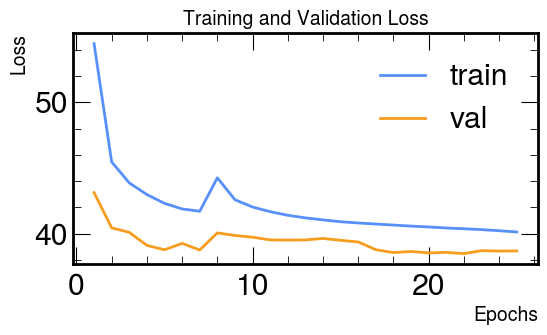

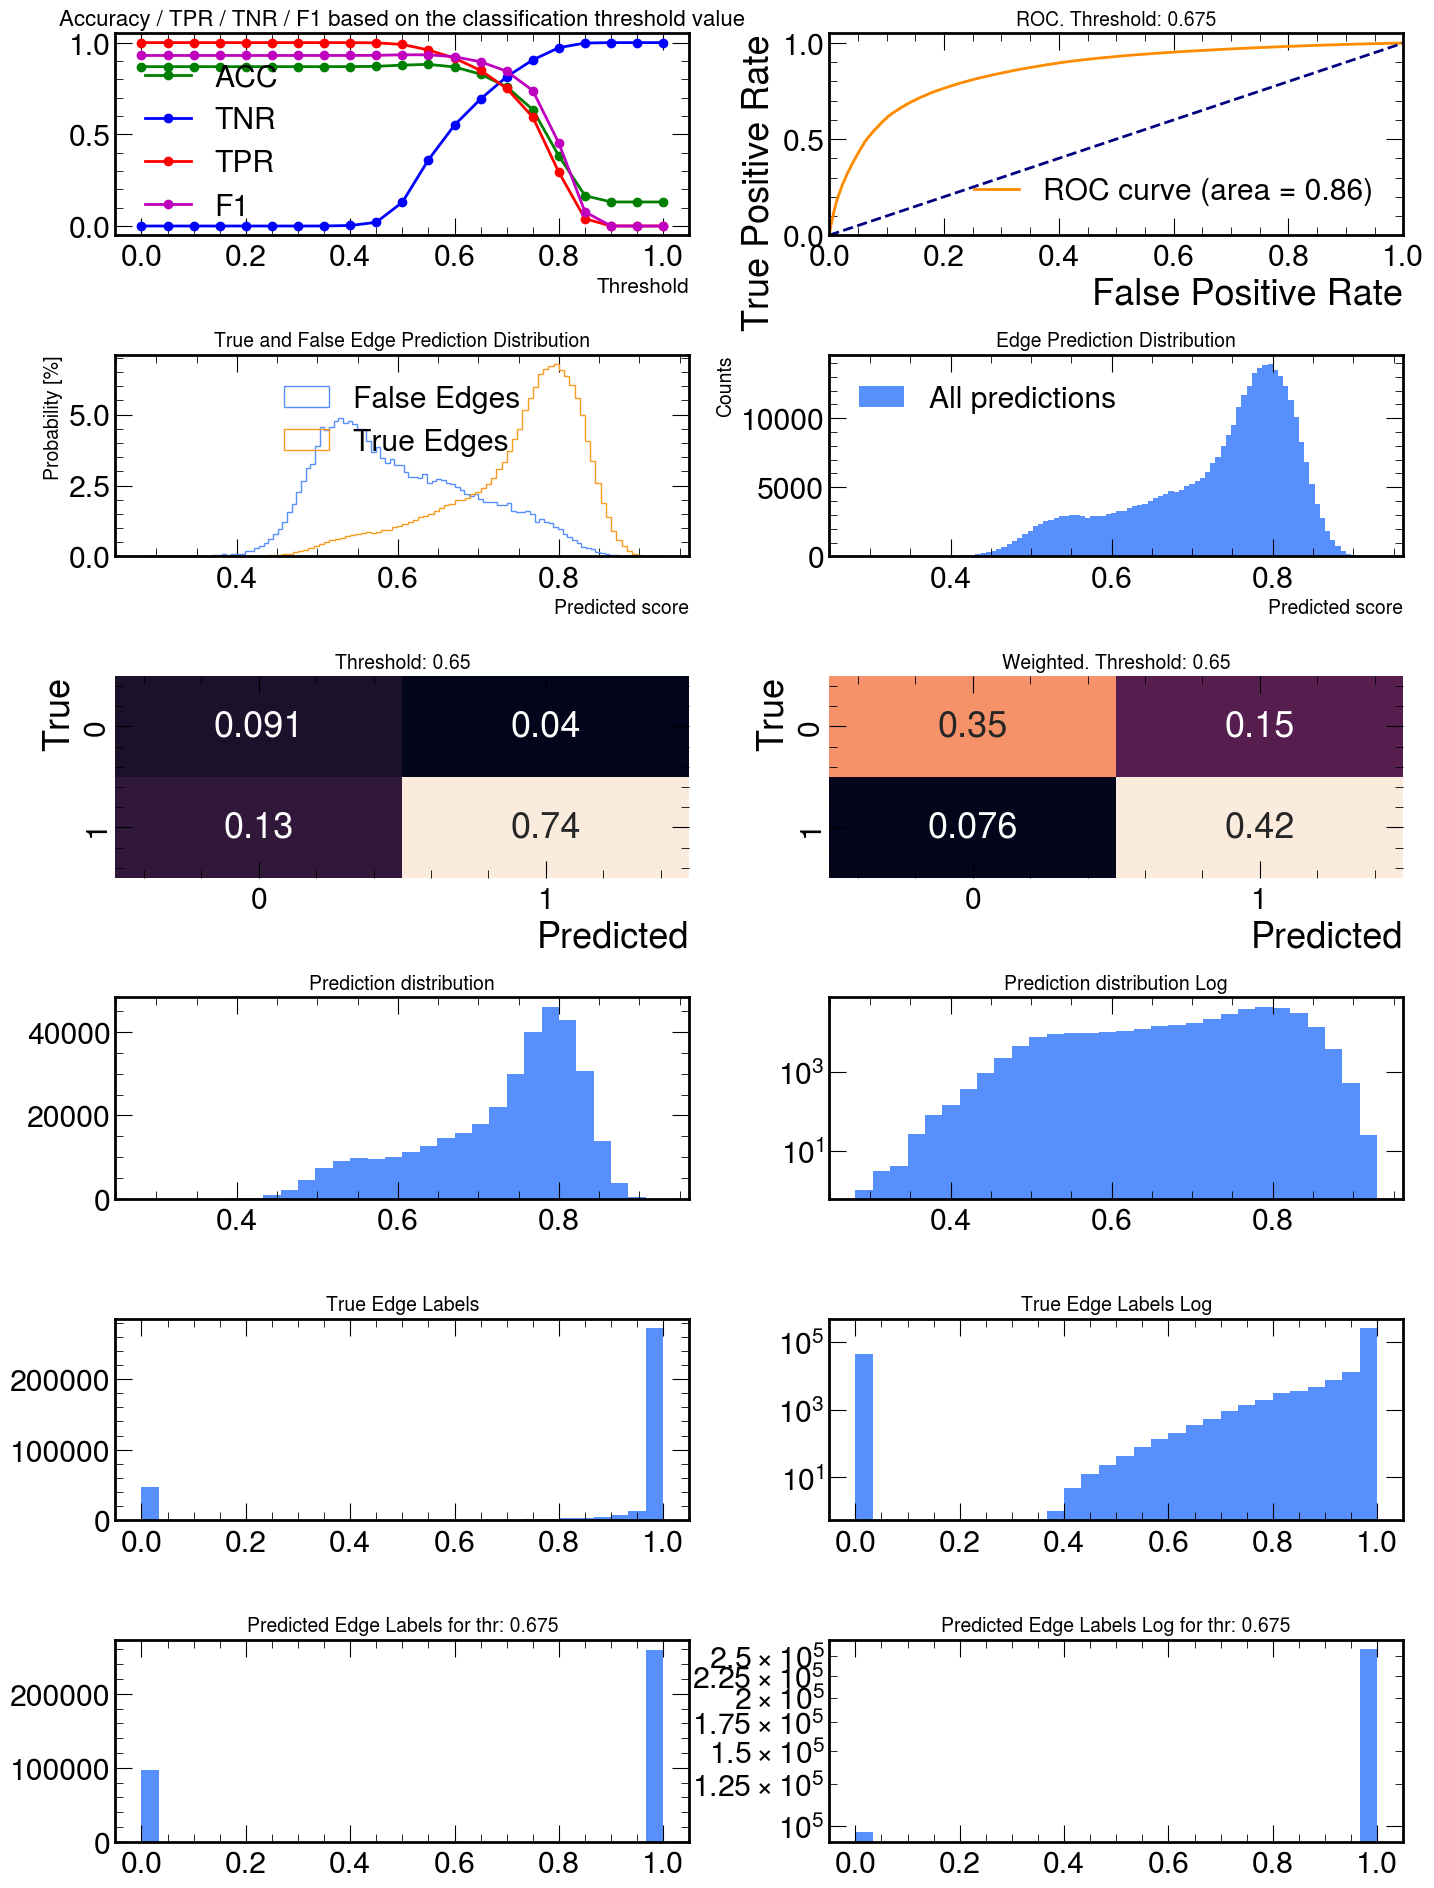

Epoch: 1


Training Epoch 1: 100%|██████████| 3600/3600 [00:46<00:00, 77.46it/s]


Validation step


Validation Epoch 1: 100%|██████████| 400/400 [00:01<00:00, 286.02it/s]


Epoch: 2


Training Epoch 2: 100%|██████████| 3600/3600 [00:46<00:00, 76.97it/s]


Validation step


Validation Epoch 2: 100%|██████████| 400/400 [00:01<00:00, 283.85it/s]


Epoch: 3


Training Epoch 3: 100%|██████████| 3600/3600 [00:47<00:00, 76.29it/s]


Validation step


Validation Epoch 3: 100%|██████████| 400/400 [00:01<00:00, 287.59it/s]


Epoch: 4


Training Epoch 4: 100%|██████████| 3600/3600 [00:49<00:00, 72.29it/s]


Validation step


Validation Epoch 4: 100%|██████████| 400/400 [00:01<00:00, 288.58it/s]


Epoch: 5


Training Epoch 5: 100%|██████████| 3600/3600 [00:50<00:00, 70.75it/s]


Validation step


Validation Epoch 5: 100%|██████████| 400/400 [00:01<00:00, 287.60it/s]


Epoch: 6


Training Epoch 6: 100%|██████████| 3600/3600 [00:47<00:00, 75.43it/s]


Validation step


Validation Epoch 6: 100%|██████████| 400/400 [00:01<00:00, 283.89it/s]


Epoch: 7


Training Epoch 7: 100%|██████████| 3600/3600 [00:48<00:00, 74.99it/s]


Validation step


Validation Epoch 7: 100%|██████████| 400/400 [00:01<00:00, 289.09it/s]


Epoch: 8


Training Epoch 8: 100%|██████████| 3600/3600 [00:47<00:00, 75.72it/s] 


Validation step


Validation Epoch 8: 100%|██████████| 400/400 [00:01<00:00, 287.61it/s]


Epoch: 9


Training Epoch 9: 100%|██████████| 3600/3600 [00:52<00:00, 68.68it/s]


Validation step


Validation Epoch 9: 100%|██████████| 400/400 [00:01<00:00, 289.63it/s]


Epoch: 10


Training Epoch 10: 100%|██████████| 3600/3600 [00:52<00:00, 68.32it/s]


Validation step


Validation Epoch 10: 100%|██████████| 400/400 [00:01<00:00, 285.44it/s]


Epoch: 11


Training Epoch 11: 100%|██████████| 3600/3600 [00:53<00:00, 67.79it/s]


Validation step


Validation Epoch 11: 100%|██████████| 400/400 [00:01<00:00, 283.70it/s]


Epoch: 12


Training Epoch 12: 100%|██████████| 3600/3600 [00:51<00:00, 69.70it/s]


Validation step


Validation Epoch 12: 100%|██████████| 400/400 [00:01<00:00, 283.20it/s]


Epoch: 13


Training Epoch 13: 100%|██████████| 3600/3600 [00:52<00:00, 68.38it/s]


Validation step


Validation Epoch 13: 100%|██████████| 400/400 [00:01<00:00, 280.39it/s]


Epoch: 14


Training Epoch 14: 100%|██████████| 3600/3600 [00:53<00:00, 67.47it/s]


Validation step


Validation Epoch 14: 100%|██████████| 400/400 [00:01<00:00, 281.85it/s]


Epoch: 15


Training Epoch 15: 100%|██████████| 3600/3600 [00:53<00:00, 67.09it/s]


Validation step


Validation Epoch 15: 100%|██████████| 400/400 [00:01<00:00, 282.87it/s]


Epoch: 16


Training Epoch 16: 100%|██████████| 3600/3600 [00:53<00:00, 67.31it/s]


Validation step


Validation Epoch 16: 100%|██████████| 400/400 [00:01<00:00, 282.24it/s]


Epoch: 17


Training Epoch 17: 100%|██████████| 3600/3600 [00:53<00:00, 67.26it/s]


Validation step


Validation Epoch 17: 100%|██████████| 400/400 [00:01<00:00, 278.35it/s]


Epoch: 18


Training Epoch 18: 100%|██████████| 3600/3600 [00:54<00:00, 66.41it/s]


Validation step


Validation Epoch 18: 100%|██████████| 400/400 [00:01<00:00, 280.31it/s]


Epoch: 19


Training Epoch 19: 100%|██████████| 3600/3600 [00:53<00:00, 66.83it/s]


Validation step


Validation Epoch 19: 100%|██████████| 400/400 [00:01<00:00, 278.23it/s]


Epoch: 20


Training Epoch 20: 100%|██████████| 3600/3600 [00:54<00:00, 66.66it/s]


Validation step


Validation Epoch 20: 100%|██████████| 400/400 [00:01<00:00, 278.83it/s]


Epoch: 20
Scores for Classification with Threshold: 0.675.
F1 score: 0.873
Balanced Accuracy: 0.780
Accuracy: 0.797
Precision: 95.6496
Recall: 80.2859
Negative predictive value: 36.7016
True negative rate: 75.7886
Precision Weighted: [0.79357548 0.76830594]
Recall Weighted: [0.75788595 0.80285903]
F1 score Weighted: [0.77532021 0.78520254]
Positive Likelihood Ratio: 3.3160364326782292
Negative Likelihood Ratio: 0.2601195810273782
Epoch: 21


Training Epoch 21: 100%|██████████| 3600/3600 [00:54<00:00, 66.37it/s]


Validation step


Validation Epoch 21: 100%|██████████| 400/400 [00:01<00:00, 274.18it/s]


Epoch: 22


Training Epoch 22: 100%|██████████| 3600/3600 [00:54<00:00, 66.02it/s]


Validation step


Validation Epoch 22: 100%|██████████| 400/400 [00:01<00:00, 275.98it/s]


Epoch: 23


Training Epoch 23: 100%|██████████| 3600/3600 [00:54<00:00, 66.10it/s]


Validation step


Validation Epoch 23: 100%|██████████| 400/400 [00:01<00:00, 275.33it/s]


Epoch: 24


Training Epoch 24: 100%|██████████| 3600/3600 [00:54<00:00, 66.28it/s]


Validation step


Validation Epoch 24: 100%|██████████| 400/400 [00:01<00:00, 274.21it/s]


Epoch: 25


Training Epoch 25: 100%|██████████| 3600/3600 [00:53<00:00, 67.28it/s]


Validation step


Validation Epoch 25: 100%|██████████| 400/400 [00:01<00:00, 273.80it/s]


Epoch: 26


Training Epoch 26:  72%|███████▏  | 2598/3600 [00:39<00:15, 66.03it/s]

In [ ]:
# decision_th = 0.5
os.makedirs(model_folder, exist_ok=True)

train_loss_hist = []
val_loss_hist = []
date = f"{datetime.datetime.now():%Y-%m-%d}"

fig_loss, ax_loss = plt.subplots(1, 1)
fig_loss.set_figwidth(6)
fig_loss.set_figheight(3)

fig_analysis, ax_analysis = plt.subplots(6, 2)
fig_analysis.set_figwidth(15)
fig_analysis.set_figheight(20)
fig_analysis.tight_layout(pad=2.0)

display_loss = display(1, display_id=True)
display_analysis = display(2, display_id=True)

for epoch in range(start_epoch, epochs):
    print(f'Epoch: {epoch+1}')
    
    loss = train(model, optimizer, train_dl, epoch+1, device=device, loss_obj=loss_obj)
    train_loss_hist.append(loss)
    
    val_loss, pred, y = test(model, test_dl, epoch+1, loss_obj=loss_obj, device=device)
    val_loss_hist.append(val_loss)
    
    ax_loss.clear()
    plot_loss(train_loss_hist, val_loss_hist, ax=ax_loss)
    display_loss.update(fig_loss)
    time.sleep(1)
    
    early_stopping(model, val_loss)
    if early_stopping.early_stop:
        print(f"Early stopping after {epoch+1} epochs")
        early_stopping.load_best_model(model)
        
        for axes in ax_analysis:
            for ax in axes:
                ax.clear()
                
        plot_validation_results(pred, y, save=True, ax=ax_analysis, output_folder=model_folder, file_suffix=f"epoch_{epoch+1}_date_{date}")
        display_analysis.update(fig_analysis)
        time.sleep(1)
        break
      
    if ((epoch+1)%60==0 or epoch+1==epochs):
        print(f'Epoch: {epoch+1}')
        
        for axes in ax_analysis:
            for ax in axes:
                ax.clear()
            
        plot_validation_results(pred, y, save=True, ax=ax_analysis, output_folder=model_folder, file_suffix=f"epoch_{epoch+1}_date_{date}")
        display_analysis.update(fig_analysis)
        time.sleep(1)
        
        save_model(model, epoch, optimizer, loss, val_loss, output_folder=model_folder, filename=f"model_epoch_{epoch+1}_date_{date}_loss_{loss:.4f}.pt")
    elif ((epoch+1)%20==0):
        print(f'Epoch: {epoch+1}')
        
        for axes in ax_analysis:
            for ax in axes:
                ax.clear()
        plot_validation_results(pred, y, save=False, ax=ax_analysis) 
        display_analysis.update(fig_analysis)
        time.sleep(1)

    scheduler.step() 